Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


#Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


#Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 50)

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Wrangling

In [ ]:
# Reading the dataset containing Women's Clothing E-Commerce Reviews
df=pd.read_csv('/content/drive/MyDrive/NLP_Project/Womens Clothing E-Commerce Reviews.csv')

In [ ]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to close front... looked awkward. nice long sleeves.\nnot for me but maybe for others. just ok.",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store and didn't order it online. with different fabric, it would have been great.",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties and we","I bought this dress for a wedding i have this summer, and it's so cute. unfortunately the fit isn't perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and shoulders. if i wanted to spend the money, i could get it tailored, but i just felt like it might not be worth it. side note - this dress was delivered to me with a nordstrom tag on it and i found it much cheaper there after looking!",3,1,2,General,Dresses,Dresses


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace=True)

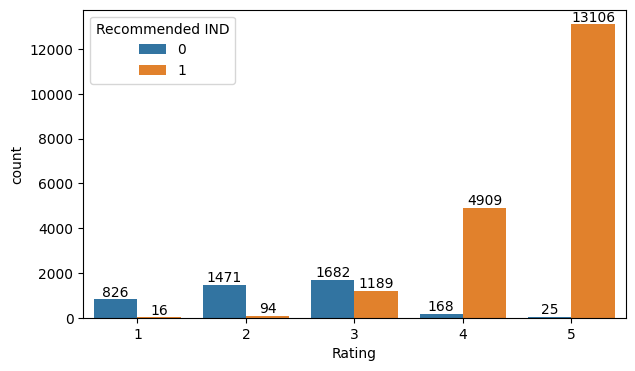

In [ ]:
# Creating a figure with a specific size for the plot
plt.figure(figsize = (7,4))
# Creating a countplot to visualize the distribution of Ratings with respect to the Recommended IND variable
ax = sns.countplot(x="Rating",# x-axis represents the 'Rating' column from the DataFrame
                   data=df,
                   hue = "Recommended IND")
# Adding labels to the bars on the countplot
for p in ax.containers:
    ax.bar_label(p)

In [ ]:
df["Recommended IND"].unique()

array([1, 0])

In [ ]:
len(df)

23486

In [ ]:
# Calculating the number of instances where Rating is 1 and Recommended IND is 1
len(df[(df["Rating"] == 1) & (df["Recommended IND"] == 1)])

16

In [ ]:
len(df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))])

23470

In [ ]:
# Filtering the DataFrame to remove certain instances based on Rating and Recommended IND conditions
# Removing instances where customers rated 1 and recommended the productdf = df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 2) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 3) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 4) & (df["Recommended IND"] == 0))]
df = df[~((df["Rating"] == 5) & (df["Recommended IND"] == 0))]

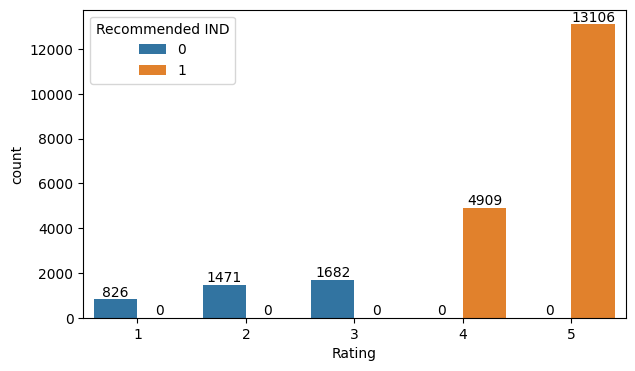

In [ ]:
plt.figure(figsize = (7,4))
ax = sns.countplot(x="Rating",
                   data=df,
                   hue = "Recommended IND")
for p in ax.containers:
  ax.bar_label(p)

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [ ]:
df['Recommended IND'].value_counts()

1    18015
0     3979
Name: Recommended IND, dtype: int64

In [ ]:
df.value_counts('Recommended IND', normalize=True)

Recommended IND
1    0.819087
0    0.180913
dtype: float64

1    18015
0     3979
Name: Recommended IND, dtype: int64


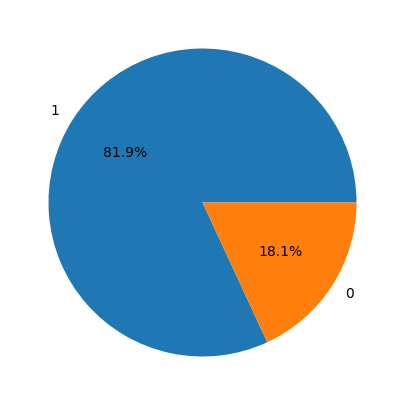

In [ ]:
# Printing the count of values in the 'Recommended IND' column
print(df["Recommended IND"].value_counts())
# Creating a pie chart to visualize the distribution of 'Recommended IND' values
df["Recommended IND"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(5,5))
plt.ylabel("");

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [ ]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [ ]:
df_copy=df[['Review Text', 'Recommended IND']]

In [ ]:
df_copy

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comfortable,1
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",1
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",0
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",1
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,1
...,...,...
23479,"So i wasn't sure about ordering this skirt because i couldn't see it in person first but i'm so glad i did. the skirt and design is well made and doesn't look or feel cheap. the color isn't blaring, offensive red so it worked with my pale skin better than i anticipated. i wore it to my daughter's dance production with tall boots and a sweater and i got numerous compliments. fit is true, i am 5'2"" and i picked the petite length. the skirt has a slight a-line rather than a tight pencil fit but the",1
23480,NaN,1
23481,I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.,1
23483,"This fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store and didn't order it online. with different fabric, it would have been great.",0


In [ ]:
pd.set_option('display.max_colwidth', None)
# Setting 'display.max_colwidth' to 'None' allows Pandas to display the complete content of columns
# without truncation when showing DataFrames in the output.

In [ ]:
# Renaming columns in a DataFrame copy for improved readability and understanding
df_copy = df_copy.rename(columns={"Recommended IND": "target", "Review Text": "text"})
# Displaying the first 30 rows of
df_copy.head(30)

,text,target
0,Absolutely wonderful - silky and sexy and comfortable,1
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",1
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",0
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",1
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,1
5,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",0
6,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.",1
7,"I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants). everything went with it. the color is really nice charcoal with shimmer, and went well with pencil skirts, flare pants, etc. my only compaint is it is a bit big, sleeves are long and it doesn't go in petite. also a bit loose for me, but no xxs... so i kept it and wil ldecide later since the light color is already sold out in hte smallest size...",1
8,I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.,1
9,"I'm 5""5' and 125 lbs. i ordered the s petite to make sure the length wasn't too long. i typically wear an xs regular in retailer dresses. if you're less busty (34b cup or smaller), a s petite will fit you perfectly (snug, but not tight). i love that i could dress it up for a party, or down for work. i love that the tulle is longer then the fabric underneath.",1


---
---


### Missing Value Detection

In [ ]:
df_copy.isna().sum()

text      819
target      0
dtype: int64

In [ ]:
df_copy.dropna(inplace=True)

In [ ]:
df_copy.isna().sum()

text      0
target    0
dtype: int64

In [ ]:
df.reset_index(drop=True, inplace=True)

1    17261
0     3914
Name: target, dtype: int64


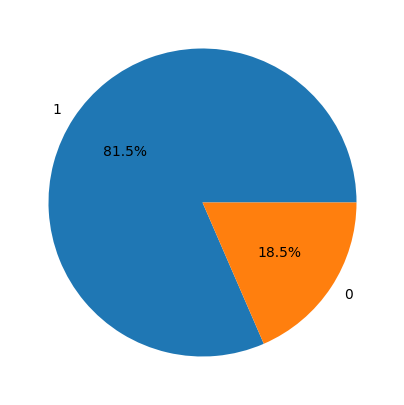

In [ ]:
# Printing the count of values in the 'target' column
print(df_copy["target"].value_counts())
df_copy["target"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(5,5))
plt.ylabel("");

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [ ]:
#Importing stopwords from NLTK and creating a set of English stopwords
stop_words = set(stopwords.words('english'))
#Defining additional words to exclude from the stop words set
words_to_exclude = {"no", "not"}
#Removing the words present in the 'words_to_exclude' set from the 'stop_words' set
stop_words.difference_update(words_to_exclude)

In [ ]:
def cleaning(data):

    import re

    # Removing URLs starting with 'http'&'www'
    data = re.sub('http\S*', '', data).strip()
    data = re.sub('www\S*', '', data).strip()

    # Removing hashtags
    data = re.sub('#\S*', '', data).strip()

    # Removing mentions starting with '@'
    data = re.sub('@\S*', '', data).strip()


    data = data.replace("'", "") # Removing single quotes

    #Tokenizing and converting to lowercase
    text_tokens = word_tokenize(data.lower())

    # Removing punctuation and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    # Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    # Lemmatizing words
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]


    # Joining the cleaned tokens back into a string and returning the processed text
    return " ".join( text_cleaned)

In [ ]:
cleaning_text = pd.DataFrame(df_copy["text"].apply(cleaning))

In [ ]:
df_copy['text'] = cleaning_text['text']

In [ ]:
df_copy

,text,target
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite,1
2,high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c,0
3,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment,1
4,shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt,1
...,...,...
23478,surprised positive review product terrible cut weird place make look wide skirt also not like picture darker heavier material isnt great return,0
23479,wasnt sure ordering skirt couldnt see person first im glad skirt design well made doesnt look feel cheap color isnt blaring offensive red worked pale skin better anticipated wore daughter dance production tall boot sweater got numerous compliment fit true picked petite length skirt slight rather tight pencil fit,1
23481,happy snag dress great price easy slip flattering cut color combo,1
23483,fit well top see never would worked im glad able try store didnt order online different fabric would great,0


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [ ]:
df_copy

,text,target
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite,1
2,high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c,0
3,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment,1
4,shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt,1
...,...,...
23478,surprised positive review product terrible cut weird place make look wide skirt also not like picture darker heavier material isnt great return,0
23479,wasnt sure ordering skirt couldnt see person first im glad skirt design well made doesnt look feel cheap color isnt blaring offensive red worked pale skin better anticipated wore daughter dance production tall boot sweater got numerous compliment fit true picked petite length skirt slight rather tight pencil fit,1
23481,happy snag dress great price easy slip flattering cut color combo,1
23483,fit well top see never would worked im glad able try store didnt order online different fabric would great,0


In [ ]:
class_positive=df_copy[df_copy['target']==1]['text']
class_negative=df_copy[df_copy['target']==0]['text']

In [ ]:
class_negative

2        high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c
5                                      love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress
10                                                                                                                   dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back
22                                                            fi

### Collect Words (positive and negative separately)

In [ ]:
positive_w=" ".join(class_positive)

In [ ]:
nigative_w=" ".join(class_negative)

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [ ]:
from wordcloud import WordCloud

In [ ]:
worldcloud_p= WordCloud(background_color="white", max_words =250)

In [ ]:
worldcloud_p.generate(positive_w)

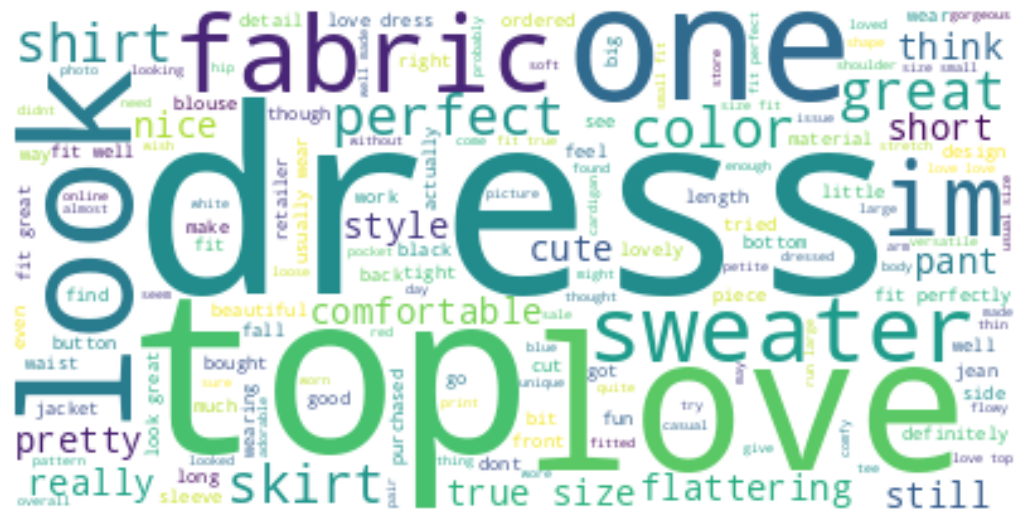

In [ ]:
import matplotlib.pyplot as plt # The matplotlib library is used for visualization purposes
plt.figure(figsize = (13,13))
plt.imshow(worldcloud_p, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
worldcloud_n= WordCloud(background_color="white", max_words =250)


In [ ]:
worldcloud_n.generate(nigative_w)


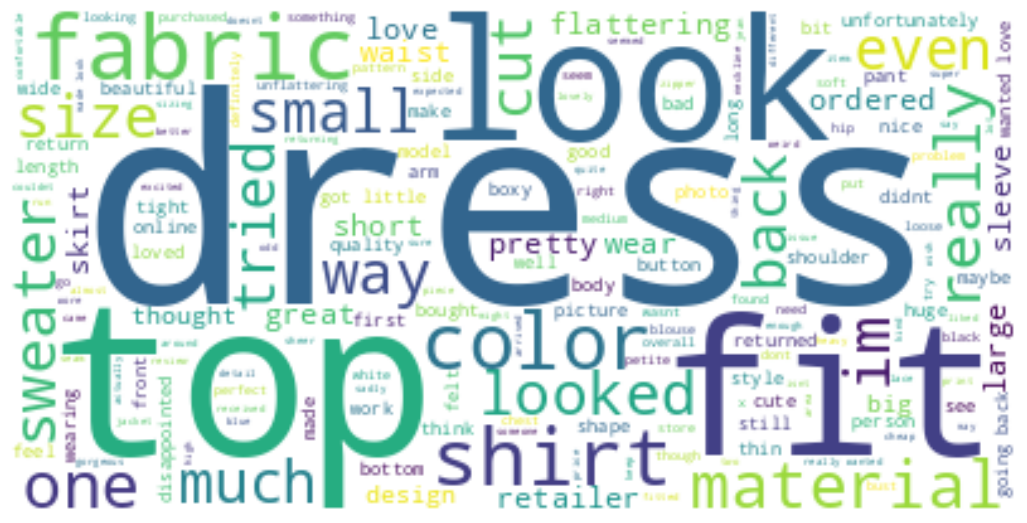

In [ ]:
import matplotlib.pyplot as plt # The matplotlib library is used for visualization purposes
plt.figure(figsize = (13,13))
plt.imshow(worldcloud_n, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_copy["text"]
y = df_copy["target"].map({0:1, 1:0}).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

#X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Next, split the temporary set into a validation set and a final training set.
#X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=42)

# Now, you have split your data into training, validation, and test sets.
# X_train, y_train are for training your model.
# X_val, y_val are for validating your model during training.
# X_test, y_test are for evaluating your model's performance after training

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Creating a CountVectorizer object with custom preprocessor function and maximum document frequency threshold
vectorizer = CountVectorizer(preprocessor=cleaning,max_df = 0.90)
# Fit-transforming the training data
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,aaaaaaamazing,aaaaandidontwanttopayforshipping,aaaaannnnnnd,aaaahmazing,ab,abbey,abby,abck,abdomen,abdominal,abhor,ability,able,abnormal,abnormally,abo,abou,abroad,abruptly,abso,absolute,absolutely,absolutley,absolutly,...,yumi,yummiest,yummy,yup,zag,zara,zed,zermatt,zero,zig,zigzag,zigzagging,zillion,zip,zipepr,ziploc,zipped,zipper,zippered,zipping,zone,zoolanders,zoom,zooming,zuma
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16935,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16936,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16937,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16938,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Creating a TfidfVectorizer object with custom preprocessor function and minimum document frequency threshold
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
# Fit-transforming the training data 'X_train' to convert it into a TF-IDF representation
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
tf_idf_vectorizer.get_feature_names_out()

array(['aa', 'ab', 'abby', ..., 'zipping', 'zone', 'zoom'], dtype=object)

In [ ]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out(),index= X_train.index)
# This code converts the TF-IDF transformed training data into a DataFrame
# The DataFrame contains TF-IDF values for each feature extracted from the text data in X_train

# 'X_train_tf_idf' is the TF-IDF transformed representation of the training data
# 'tf_idf_vectorizer.get_feature_names_out()' retrieves the feature names generated by the TfidfVectorizer

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,absurd,abt,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,accessorized,accessorizing,...,yet,yikes,yo,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yr,yuck,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
3996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.265276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Eval Function

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [ ]:
def eval(model, X_train, X_test):
   # Predicting labels for the test set and the training set
    y_pred = model.predict(X_test) # Predicting labels for the test set
    y_pred_train = model.predict(X_train)# Predicting labels for the training set
    # Printing confusion matrix and classification report for the test set
    print(confusion_matrix(y_test, y_pred))# Displaying confusion matrix for the test set
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression
## Countvectorizer

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced') #we have unbalanced classes
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000)

In [ ]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[3025  427]
 [ 100  683]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      3452
           1       0.62      0.87      0.72       783

    accuracy                           0.88      4235
   macro avg       0.79      0.87      0.82      4235
weighted avg       0.90      0.88      0.88      4235

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     13809
           1       0.66      0.92      0.77      3131

    accuracy                           0.90     16940
   macro avg       0.82      0.91      0.85     16940
weighted avg       0.92      0.90      0.90     16940



In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = ['accuracy', 'precision', 'recall', 'f1']

In [ ]:
# This creates a Logistic Regression model with regularization parameter C=0.02, maximum iterations set to 1000,
model = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.878808
train_accuracy     0.896452
test_precision     0.624193
train_precision    0.657903
test_recall        0.866818
train_recall       0.916143
test_f1            0.725673
train_f1           0.765838
dtype: float64

In [ ]:
!pip install scikit-plot

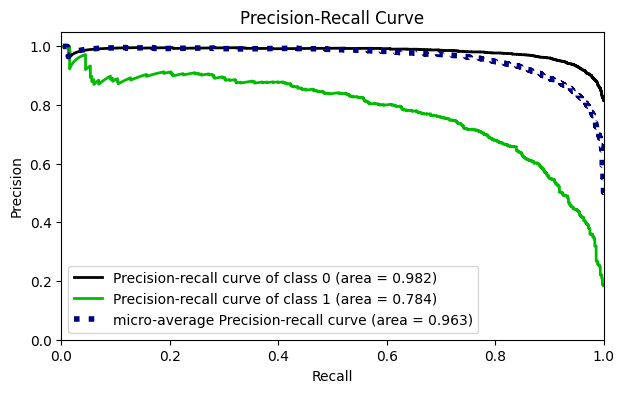

In [ ]:
# implements the precision_recall because we have unbalanced data
from scikitplot.metrics import plot_roc, plot_precision_recall
from sklearn.metrics import average_precision_score

model = LogisticRegression(C = 0.02, max_iter=1000)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y_pred_proba

array([[0.31072254, 0.68927746],
       [0.97585681, 0.02414319],
       [0.49703769, 0.50296231],
       ...,
       [0.24191939, 0.75808061],
       [0.94592624, 0.05407376],
       [0.79125567, 0.20874433]])

In [ ]:
y_pred = log.predict(X_test_count)
log_count_rec_neg = recall_score(y_test, y_pred)
log_count_f1_neg = f1_score(y_test, y_pred)
log_AP_neg = average_precision_score(y_test, y_pred_proba[:,1])

## LG TF-IDF

In [ ]:
log_t = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced') #we have unbalanced classes
log_t.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000)

In [ ]:
print("LOG MODEL")
eval(log_t, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[2911  541]
 [ 102  681]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3452
           1       0.56      0.87      0.68       783

    accuracy                           0.85      4235
   macro avg       0.76      0.86      0.79      4235
weighted avg       0.89      0.85      0.86      4235

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     13809
           1       0.58      0.90      0.71      3131

    accuracy                           0.86     16940
   macro avg       0.78      0.88      0.81     16940
weighted avg       0.90      0.86      0.87     16940



In [ ]:
#cross validation
model = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.853719
train_accuracy     0.861905
test_precision     0.567644
train_precision    0.582027
test_recall        0.877362
train_recall       0.897087
test_f1            0.689226
train_f1           0.706001
dtype: float64

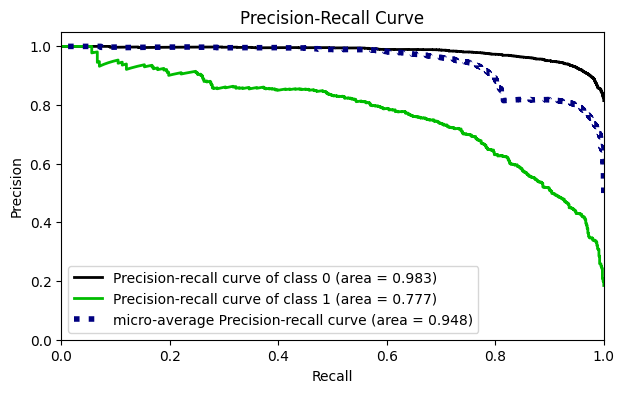

In [ ]:
# implements the precision_recall because we have unbalanced data

from scikitplot.metrics import plot_roc, plot_precision_recall
from sklearn.metrics import average_precision_score

model = LogisticRegression(C = 0.02, max_iter=1000)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = log_t.predict(X_test_tf_idf)
log_Tf_rec_neg = recall_score(y_test, y_pred)
log_Tf_f1_neg = f1_score(y_test, y_pred)
log_Tf_neg = average_precision_score(y_test, y_pred_proba[:, 1])

## Naive Bayes
## Countvectorizer

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [ ]:
nb = BernoulliNB() # This creates a Bernoulli Naive Bayes model, suitable for binary classification tasks.
nb.fit(X_train_count,y_train)# This fits the Bernoulli Naive Bayes model using the training data

BernoulliNB()

In [ ]:
print("Naive Bayes MODEL")
print("--------------------------------------------")
eval(nb, X_train_count, X_test_count)

Naive Bayes MODEL
--------------------------------------------
[[3289  163]
 [ 259  524]]
Test_Set
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3452
           1       0.76      0.67      0.71       783

    accuracy                           0.90      4235
   macro avg       0.84      0.81      0.83      4235
weighted avg       0.90      0.90      0.90      4235

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     13809
           1       0.79      0.76      0.78      3131

    accuracy                           0.92     16940
   macro avg       0.87      0.86      0.86     16940
weighted avg       0.92      0.92      0.92     16940



In [ ]:
model = BernoulliNB()
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.891499
train_accuracy     0.918923
test_precision     0.716393
train_precision    0.798235
test_recall        0.684446
train_recall       0.751233
test_f1            0.699900
train_f1           0.774017
dtype: float64

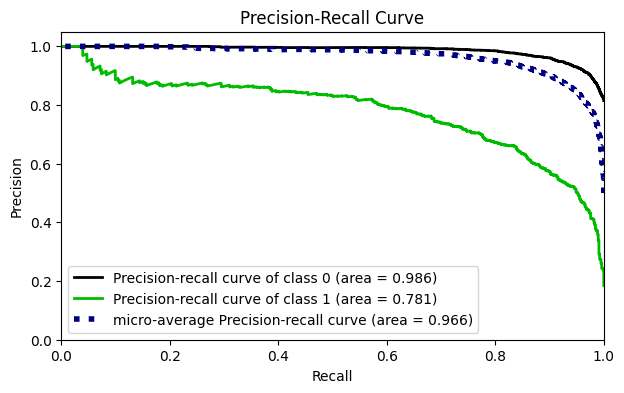

In [ ]:
model = BernoulliNB()

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = nb.predict(X_test_count)
nb_count_rec_neg = recall_score(y_test, y_pred)
nb_count_f1_neg = f1_score(y_test, y_pred)
nb_AP_neg = average_precision_score(y_test, y_pred_proba[:, 1])

In [ ]:
average_precision_score(y_test, y_pred_proba[:, 1])

0.7812125237430914

## **NB TF-IDF**

In [ ]:
nb_t = BernoulliNB()
nb_t.fit(X_train_tf_idf,y_train)

BernoulliNB()

In [ ]:
print("Naive Bayes MODEL")
print("--------------------------------------------")
eval(nb_t, X_train_tf_idf, X_test_tf_idf)

Naive Bayes MODEL
--------------------------------------------
[[3212  240]
 [ 188  595]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3452
           1       0.71      0.76      0.74       783

    accuracy                           0.90      4235
   macro avg       0.83      0.85      0.84      4235
weighted avg       0.90      0.90      0.90      4235

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     13809
           1       0.74      0.83      0.78      3131

    accuracy                           0.92     16940
   macro avg       0.85      0.88      0.87     16940
weighted avg       0.92      0.92      0.92     16940



In [ ]:
model = BernoulliNB()
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.897226
train_accuracy     0.916667
test_precision     0.702516
train_precision    0.748973
test_recall        0.770687
train_recall       0.825970
test_f1            0.734912
train_f1           0.785588
dtype: float64

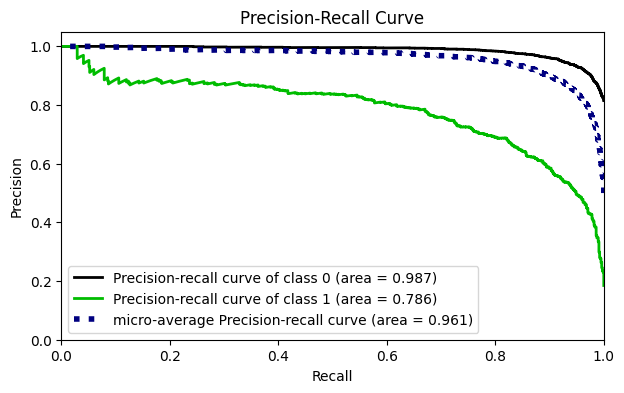

In [ ]:
model = BernoulliNB()

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = nb_t.predict(X_test_tf_idf)
nb_tf_rec_neg = recall_score(y_test, y_pred)
nb_tf_f1_neg = f1_score(y_test, y_pred)
nb_tf_neg = average_precision_score(y_test, y_pred_proba[:, 1])

## Support Vector Machine (SVM)
## Countvectorizer

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01)

In [ ]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[3328  124]
 [ 267  516]]
Test_Set
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3452
           1       0.81      0.66      0.73       783

    accuracy                           0.91      4235
   macro avg       0.87      0.81      0.83      4235
weighted avg       0.90      0.91      0.90      4235

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     13809
           1       0.89      0.74      0.81      3131

    accuracy                           0.93     16940
   macro avg       0.92      0.86      0.88     16940
weighted avg       0.93      0.93      0.93     16940



In [ ]:
model = LinearSVC(C=0.01)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.907438
train_accuracy     0.934435
test_precision     0.814176
train_precision    0.889811
test_recall        0.647076
train_recall       0.736470
test_f1            0.720997
train_f1           0.805908
dtype: float64

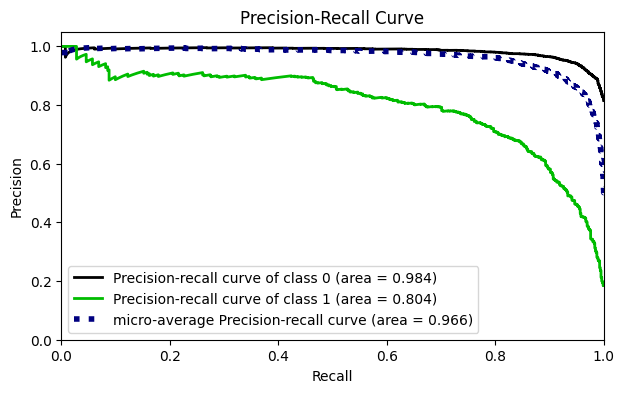

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall
from sklearn.calibration import CalibratedClassifierCV

model = LinearSVC(C=0.01)

# Create a CalibratedClassifierCV object
clf = CalibratedClassifierCV(model)

# Fit the CalibratedClassifierCV object to the training data
clf.fit(X_train_count, y_train)

# Get the predicted probabilities for the test data
y_proba = clf.predict_proba(X_test_count)

plot_precision_recall(y_test, y_proba)
plt.show();

In [ ]:
y_pred = svc.predict(X_test_count)
svc_rec_neg = recall_score(y_test, y_pred)
svc_f1_neg = f1_score(y_test, y_pred)
svc_neg = average_precision_score(y_test, y_pred_proba[:, 1])

## SVC TF-IDF

In [ ]:
svc_tf = LinearSVC(C=0.01)
svc_tf.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.01)

In [ ]:
print("SVC MODEL")
eval(svc_tf, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[3443    9]
 [ 636  147]]
Test_Set
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3452
           1       0.94      0.19      0.31       783

    accuracy                           0.85      4235
   macro avg       0.89      0.59      0.61      4235
weighted avg       0.86      0.85      0.80      4235

Train_Set
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     13809
           1       0.95      0.18      0.30      3131

    accuracy                           0.85     16940
   macro avg       0.89      0.59      0.61     16940
weighted avg       0.86      0.85      0.80     16940



In [ ]:
model = LinearSVC(C=0.01)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.838135
train_accuracy     0.840207
test_precision     0.941573
train_precision    0.950851
test_recall        0.132546
train_recall       0.142837
test_f1            0.232058
train_f1           0.248354
dtype: float64

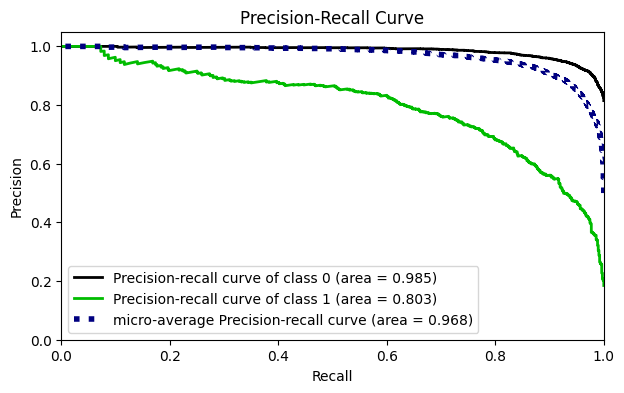

In [ ]:
model = LinearSVC(C=0.01)

# Create a CalibratedClassifierCV object
clf = CalibratedClassifierCV(model)

# Fit the CalibratedClassifierCV object to the training data
clf.fit(X_train_tf_idf, y_train)

# Get the predicted probabilities for the test data
y_proba = clf.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_proba)
plt.show();

In [ ]:
y_pred = svc_tf.predict(X_test_tf_idf)
svc_tf_rec_neg = recall_score(y_test, y_pred)
svc_tf_f1_neg = f1_score(y_test, y_pred)
svc_tf_neg = average_precision_score(y_test, y_pred_proba[:, 1])

## Random Forest

### Countvectorizer

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=40, n_jobs=-1,
                       random_state=42)

In [ ]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[3309  143]
 [ 310  473]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      3452
           1       0.77      0.60      0.68       783

    accuracy                           0.89      4235
   macro avg       0.84      0.78      0.81      4235
weighted avg       0.89      0.89      0.89      4235

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13809
           1       0.96      0.97      0.97      3131

    accuracy                           0.99     16940
   macro avg       0.98      0.98      0.98     16940
weighted avg       0.99      0.99      0.99     16940



In [ ]:
model = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.893979
train_accuracy     0.988194
test_precision     0.793894
train_precision    0.961151
test_recall        0.576489
train_recall       0.975585
test_f1            0.667753
train_f1           0.968303
dtype: float64

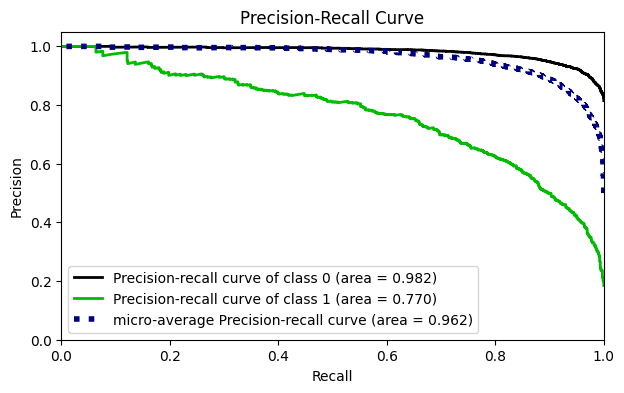

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1, class_weight="balanced")

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred_proba[:, 1]

array([0.47421738, 0.15851574, 0.42642731, ..., 0.63443351, 0.28911875,
       0.29448905])

In [ ]:
y_pred = rf.predict(X_test_count)
rf_count_rec_neg = recall_score(y_test, y_pred)
rf_count_f1_neg = f1_score(y_test, y_pred)
rf_AP_neg = average_precision_score(y_test, y_pred_proba[:, 1])

### TF-IDF

In [ ]:
rf_t = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1, class_weight="balanced")
rf_t.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=40, n_jobs=-1,
                       random_state=42)

In [ ]:
print("RF MODEL")
eval(rf_t, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[3306  146]
 [ 343  440]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3452
           1       0.75      0.56      0.64       783

    accuracy                           0.88      4235
   macro avg       0.83      0.76      0.79      4235
weighted avg       0.88      0.88      0.88      4235

Train_Set
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     13809
           1       0.98      0.99      0.98      3131

    accuracy                           0.99     16940
   macro avg       0.99      0.99      0.99     16940
weighted avg       0.99      0.99      0.99     16940



In [ ]:
model = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.885301
train_accuracy     0.993605
test_precision     0.763971
train_precision    0.974721
test_recall        0.549665
train_recall       0.991128
test_f1            0.639240
train_f1           0.982849
dtype: float64

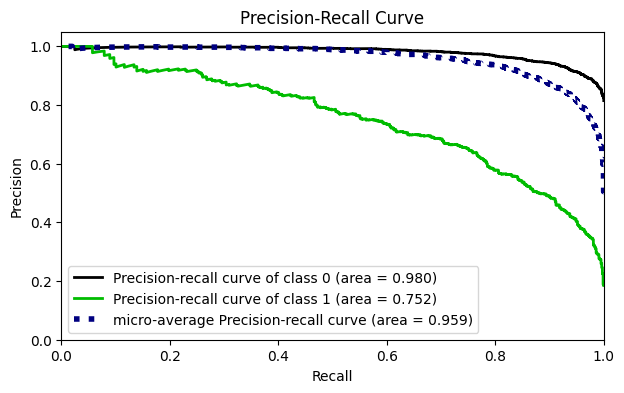

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1, class_weight="balanced")

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = rf_t.predict(X_test_tf_idf)
rf_tf_rec_neg = recall_score(y_test, y_pred)
rf_tf_f1_neg = f1_score(y_test, y_pred)
rf_tf_AP_neg = average_precision_score(y_test, y_pred_proba[:, 1])

## Ada Boosting

### Countvectorizer

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [ ]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[3272  180]
 [ 269  514]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3452
           1       0.74      0.66      0.70       783

    accuracy                           0.89      4235
   macro avg       0.83      0.80      0.82      4235
weighted avg       0.89      0.89      0.89      4235

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     13809
           1       0.85      0.75      0.79      3131

    accuracy                           0.93     16940
   macro avg       0.90      0.86      0.88     16940
weighted avg       0.93      0.93      0.93     16940



In [ ]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.900531
train_accuracy     0.931523
test_precision     0.768668
train_precision    0.858988
test_recall        0.661765
train_recall       0.753149
test_f1            0.710837
train_f1           0.802587
dtype: float64

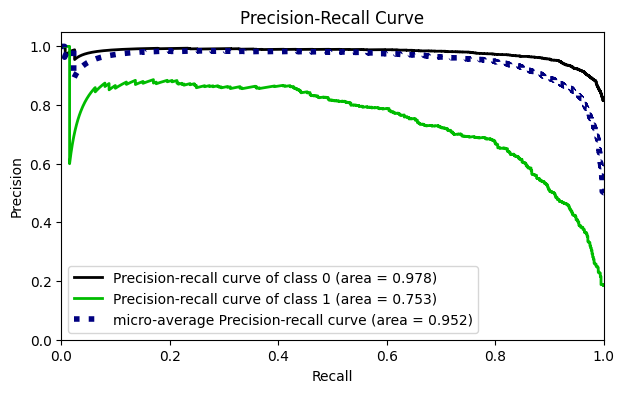

In [ ]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = ada.predict(X_test_count)
ada_count_rec_neg = recall_score(y_test, y_pred)
ada_count_f1_neg = f1_score(y_test, y_pred)
ada_AP_neg = average_precision_score(y_test, y_pred_proba[:, 1])

### TF-IDF

In [ ]:
ada_t = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada_t.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [ ]:
print("Ada MODEL")
eval(ada_t, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[3267  185]
 [ 264  519]]
Test_Set
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3452
           1       0.74      0.66      0.70       783

    accuracy                           0.89      4235
   macro avg       0.83      0.80      0.82      4235
weighted avg       0.89      0.89      0.89      4235

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     13809
           1       0.87      0.79      0.83      3131

    accuracy                           0.94     16940
   macro avg       0.91      0.88      0.90     16940
weighted avg       0.94      0.94      0.94     16940



In [ ]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.896871
train_accuracy     0.944084
test_precision     0.753506
train_precision    0.884205
test_recall        0.657614
train_recall       0.802584
test_f1            0.702076
train_f1           0.841414
dtype: float64

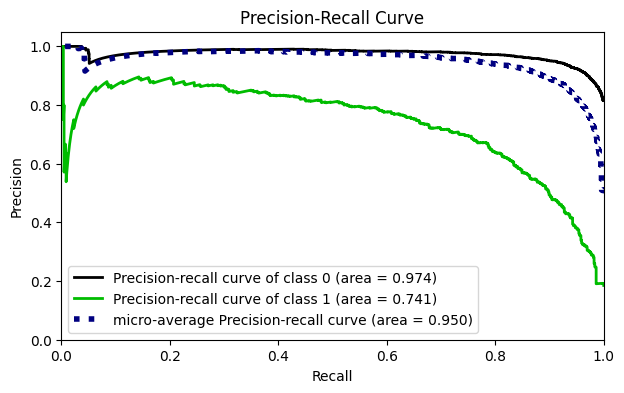

In [ ]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = AdaBoostClassifier(n_estimators= 500, random_state = 42)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [ ]:
y_pred = ada_t.predict(X_test_tf_idf)
ada_t_rec_neg = recall_score(y_test, y_pred)
ada_t_f1_neg = f1_score(y_test, y_pred)
ada_t_AP_neg = average_precision_score(y_test, y_pred_proba[:, 1])

## DL modeling

In [ ]:
#import the DL libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
df_DL = df[['Review Text', 'Recommended IND']]

In [ ]:
df_DL = df_DL.rename(columns={"Recommended IND": "target", "Review Text": "text"})

In [ ]:
df_DL=df_DL.drop_duplicates()

# we remove the duplicated rows

In [ ]:
df_DL.isnull().sum()

text      2
target    0
dtype: int64

In [ ]:
df_DL = df_DL.dropna()

In [ ]:
df_DL.reset_index(drop=True, inplace=True)

In [ ]:
X = df_DL['text']
y = df_DL['target'].map({0:1, 1:0}).values

### Creating word index

In [ ]:
#storing the tokens in the corpus according to their usage frequency
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'so': 15,
 'was': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'are': 26,
 'fit': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'wear': 31,
 'me': 32,
 "it's": 33,
 'great': 34,
 'or': 35,
 'too': 36,
 "i'm": 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'they': 41,
 'up': 42,
 'would': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'more': 49,
 'perfect': 50,
 'really': 51,
 'little': 52,
 'ordered': 53,
 'if': 54,
 'these': 55,
 'will': 56,
 'one': 57,
 'flattering': 58,
 'soft': 59,
 'well': 60,
 'an': 61,
 'out': 62,
 'can': 63,
 'comfortable': 64,
 'back': 65,
 'because': 66,
 'had': 67,
 'bought': 68,
 '\r': 69,
 'nice': 70,
 'cute': 71,
 'beautiful': 72,
 'than': 73,
 'fits': 74,
 'looks': 75,
 'all': 76,
 'when': 77,
 'bit': 78,
 'down': 79,


In [ ]:
#how many unique tokens in our corpus?
len(tokenizer.word_index)

14389

### Converting tokens to numeric

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [ ]:
#the original text
X[:2]

0                                                                                                                                                                                                                                                              Absolutely wonderful - silky and sexy and comfortable
1    Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.
Name: text, dtype: object

In [ ]:
#text after converting to to numerical
X_num_tokens[:2]

[[248, 514, 906, 3, 636, 3, 64],
 [21,
  7,
  18,
  33,
  1689,
  101,
  2,
  1314,
  8,
  220,
  5,
  9,
  4,
  105,
  3,
  37,
  299,
  2,
  131,
  1287,
  2,
  423,
  43,
  24,
  53,
  5,
  135,
  1287,
  33,
  94,
  2,
  68,
  4,
  94,
  3,
  38,
  502,
  2,
  21,
  1,
  85,
  11,
  32,
  409,
  39,
  4,
  52,
  455,
  1,
  389,
  43,
  153,
  29,
  4,
  124,
  1315,
  11,
  476,
  445,
  6,
  770,
  94]]

### Maximum number of tokens for all documents¶

In [ ]:
# Observing the number of tokens in each index(customer review)!
len(X_num_tokens[100])

63

In [ ]:
len(X_num_tokens[10])
# The 106th review consists of 7 tokens.

66

In [ ]:
len(X_num_tokens[10300])

37

In [ ]:
num_tokens = [len(sen_tokens) for sen_tokens in X_num_tokens]
num_tokens = np.array(num_tokens)
#storage the length of each token in an array

In [ ]:
num_tokens

array([ 7, 62, 97, ..., 28, 42, 19])

In [ ]:
num_tokens.max()

116

In [ ]:
max_tokens = 116

In [ ]:
len(num_tokens)

# number of all documents/lines in corpus

21168

In [ ]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

In [ ]:
sum(num_tokens <= max_tokens)

21168

### Fixing token counts of all documents (pad_sequences)

In [ ]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens, padding="pre") #I decided to use max num of tokens to make sure that we wouldn't miss any tokens

In [ ]:
X_pad.shape

(21168, 116)

In [ ]:
#padding on one index results with:
X_num_tokens[500]

[2,
 104,
 7,
 18,
 11,
 3,
 280,
 358,
 9,
 5,
 2,
 92,
 698,
 3,
 1300,
 17,
 858,
 17,
 1443,
 2,
 1907,
 3320,
 2,
 285,
 228,
 54,
 2,
 347,
 24,
 68,
 7,
 57,
 3,
 1907,
 3320,
 8,
 29,
 2331,
 14,
 32,
 1170,
 325,
 5,
 166,
 34,
 3,
 1170,
 16,
 299,
 2,
 68,
 5,
 15,
 34,
 12,
 4,
 320,
 576,
 74,
 124,
 8,
 22,
 2,
 38,
 734,
 307,
 686,
 868,
 3,
 2,
 68,
 17,
 382,
 22,
 407,
 7,
 116,
 17,
 95,
 48,
 51,
 46]

In [ ]:
len(X_num_tokens[500])

# We see that the 500th document consists of 107 tokens.

82

In [ ]:
X_pad[500]

# The padding process adds zeros to the beginning of the document to fix it to 116 tokens.

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    2,  104,    7,   18,   11,    3,  280,  358,    9,    5,
          2,   92,  698,    3, 1300,   17,  858,   17, 1443,    2, 1907,
       3320,    2,  285,  228,   54,    2,  347,   24,   68,    7,   57,
          3, 1907, 3320,    8,   29, 2331,   14,   32, 1170,  325,    5,
        166,   34,    3, 1170,   16,  299,    2,   68,    5,   15,   34,
         12,    4,  320,  576,   74,  124,    8,   22,    2,   38,  734,
        307,  686,  868,    3,    2,   68,   17,  382,   22,  407,    7,
        116,   17,   95,   48,   51,   46], dtype=int32)

### Train Set Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

### Modeling

In [ ]:
embedding_size = 50
model = Sequential()
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))

model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=True))
model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=12, return_sequences=False))

model.add(Dense(1, activation='sigmoid'))  # There are 2 classes

In [ ]:
optimizer = Adam(learning_rate=0.008)

In [ ]:
model.compile(loss='binary_crossentropy',#we have binary classes
              optimizer=optimizer,
              metrics=['Recall'])#we have unbalanced data

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 116, 50)           1000000   
                                                                 
 dropout (Dropout)           (None, 116, 50)           0         
                                                                 
 gru (GRU)                   (None, 116, 50)           15300     
                                                                 
 gru_1 (GRU)                 (None, 116, 25)           5775      
                                                                 
 dropout_1 (Dropout)         (None, 116, 25)           0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1404      
                                                                 
 dense (Dense)               (None, 1)                 1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", verbose=1,
                           patience = 2, restore_best_weights=True)

In [ ]:
pd.Series(y).value_counts(normalize=True)
weights = {0:0.18, 1:0.81}

In [ ]:
model.fit(X_train, y_train, epochs=30, batch_size=32,
         validation_data=(X_val, y_val), callbacks=[early_stop], class_weight=weights)

Epoch 1/30
477/477 [==============================] - 70s 131ms/step - loss: 0.1208 - recall: 0.8243 - val_loss: 0.2961 - val_recall: 0.8936
Epoch 2/30
477/477 [==============================] - 62s 130ms/step - loss: 0.0627 - recall: 0.9279 - val_loss: 0.2459 - val_recall: 0.7872
Epoch 3/30
477/477 [==============================] - 61s 129ms/step - loss: 0.0422 - recall: 0.9611 - val_loss: 0.2637 - val_recall: 0.7508
Epoch 3: early stopping


### Model Evaluation

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.120812,0.824348,0.296083,0.893617
1,0.062651,0.927883,0.245855,0.787234
2,0.042234,0.961085,0.263703,0.750760


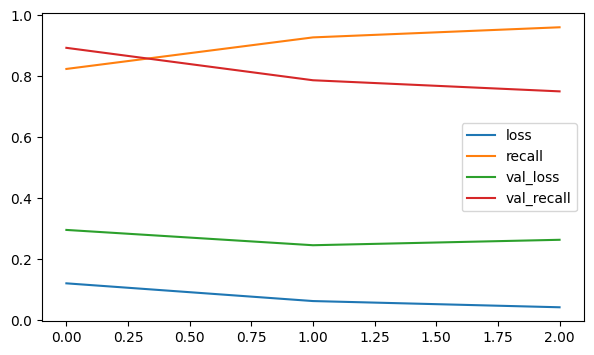

In [ ]:
model_loss.plot();

In [ ]:
model.evaluate(X_test, y_test)

133/133 [==============================] - 4s 29ms/step - loss: 0.2839 - recall: 0.9004


[0.28392601013183594, 0.9003831148147583]

In [ ]:
model.evaluate(X_train, y_train)

477/477 [==============================] - 13s 28ms/step - loss: 0.2129 - recall: 0.9522


[0.21289923787117004, 0.9521599411964417]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
def eval_metric(model, X_train, y_train, X_test, y_test):

    y_train_pred = model.predict(X_train) > 0.5
    y_pred = model.predict(X_test) > 0.5
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(model, X_train, y_train, X_test, y_test)

133/133 [==============================] - 4s 27ms/step
Test_Set
[[3038  413]
 [  78  705]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.93      3451
           1       0.63      0.90      0.74       783

    accuracy                           0.88      4234
   macro avg       0.80      0.89      0.83      4234
weighted avg       0.91      0.88      0.89      4234


Train_Set
[[11328  1111]
 [  134  2667]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     12439
           1       0.71      0.95      0.81      2801

    accuracy                           0.92     15240
   macro avg       0.85      0.93      0.88     15240
weighted avg       0.94      0.92      0.92     15240



In [ ]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

133/133 [==============================] - 4s 28ms/step


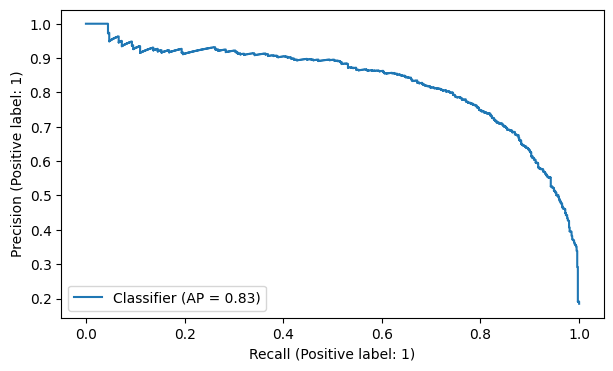

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [ ]:
y_pred_proba = model.predict(X_test)

#plot_precision_recall(y_test, y_pred_proba)
#plt.show()

133/133 [==============================] - 4s 28ms/step


In [ ]:
y_pred = model.predict(X_test)

133/133 [==============================] - 4s 29ms/step


In [ ]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y_pred

array([[0.01163749],
       [0.94547445],
       [0.01384014],
       ...,
       [0.97222424],
       [0.01185635],
       [0.9679265 ]], dtype=float32)

In [ ]:
y_pred_proba

array([[0.01163749],
       [0.94547445],
       [0.01384014],
       ...,
       [0.97222424],
       [0.01185635],
       [0.9679265 ]], dtype=float32)

In [ ]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred_proba > 0.5)  # Use probabilities and apply a threshold for binary predictions
DL_rec = recall_score(y_test, y_pred_proba > 0.5)

## BERT Modeling

### Read Data

In [ ]:
df_B = df[['Review Text', 'Recommended IND']]

In [ ]:
df_B = df_B.rename(columns={"Recommended IND": "target", "Review Text": "text"})

In [ ]:
df_B=df_B.drop_duplicates()

# we remove the duplicated rows

In [ ]:
df_B.isnull().sum()

# There aren't missing values

text      2
target    0
dtype: int64

In [ ]:
df_B = df_B.dropna()

In [ ]:
df_B.reset_index(drop=True, inplace=True)

In [ ]:
X = df_B['text']
y = df_B['target'].map({0:1, 1:0}).values

### Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

### Tokenization

In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

### Fixing token counts of all documents

In [ ]:
number_tokens_sentences = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent, add_special_tokens=True) # we use tokenizer2 for uncased
    number_tokens_sentences.append(len(input_ids))

print('Max sentence length: ', max(number_tokens_sentences))

# We will use the 'tokenizer.encode()' function to find out how many tokens the longest comment consists of and to decide on the number
# of tokens to fix for all documents/texts.

Max sentence length:  162


In [ ]:
np.array(number_tokens_sentences).mean()

76.31849962207104

In [ ]:
token_size = 162
sum(np.array(number_tokens_sentences) < token_size) / len(number_tokens_sentences)

# We will fix all documents to size 162.

0.9999527588813303

### Transformation Vectors to Matrices

In [ ]:
def transformation(X):
  # set array dimensions
  seq_len = 162

  # We create an empty list Xids for input_ids vectors and an empty list Xmask for attention_mask vectors.
  Xids = []
  Xmask = []


  for text in X: # We are pulling all lines/documents from the corpus in order.

      tokens = tokenizer.encode_plus(text, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True)
      # We are converting each text we pull from the corpus into vectors.

      # assign tokenized outputs to respective rows in numpy arrays
      Xids.append(tokens['input_ids']) # We are appending the input_ids vector corresponding to each line/document to the Xids list.
      Xmask.append(tokens['attention_mask']) # We are appending the attention_mask vector corresponding to each line/document to the Xmask list.


  return np.array(Xids), np.array(Xmask) # We are converting the Xids and Xmask matrices (row number, 24) into array format for faster operation.

In [ ]:
X_train

array([[   0,    0,    0, ...,  175,  569,   90],
       [   0,    0,    0, ...,  180,    7,   11],
       [   0,    0,    0, ...,  380,  264,  861],
       ...,
       [   0,    0,    0, ..., 1695,   15,  811],
       [   0,    0,    0, ...,   22,   79,  917],
       [   0,    0,    0, ...,   62,  401,  201]], dtype=int32)

In [ ]:
#X_train = [str(num) for num in X_train] #I converted the X_train, X_test, X_val to string because the transform didn't work with arrays and raised an error
Xids_train, Xmask_train = transformation(X_train)

# We are creating 2 separate matrices for our training set.

#X_test = [str(num) for num in X_test]
Xids_test, Xmask_test = transformation(X_test)
# We are creating 2 separate matrices for our test set.

#X_val = [str(num) for num in X_val]
Xids_val, Xmask_val = transformation(X_val)
# We are creating 2 separate matrices for our validiation set.

In [ ]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)
print("Xids_val.shape   :", Xids_val.shape)
print("Xmask_val.shape  :", Xmask_val.shape)

Xids_train.shape  : (15240, 162)
Xmask_train.shape : (15240, 162)
Xids_test.shape   : (4234, 162)
Xmask_test.shape  : (4234, 162)
Xids_val.shape   : (1694, 162)
Xmask_val.shape  : (1694, 162)


In [ ]:
y_train

array([0, 0, 0, ..., 1, 0, 0])

### Transformation Matrix to Tensorflow tensor

In [ ]:
import tensorflow as tf
dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, y_train))
dataset_train


<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, y_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
dataset_val = tf.data.Dataset.from_tensor_slices((Xids_val, Xmask_val, y_val))
dataset_val

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [ ]:
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)
dataset_val = dataset_val.map(map_func)

In [ ]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
dataset_val

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(), dtype=tf.int64, name=None))>

### Batch Size

In [ ]:
batch_size = 32

# The developers who developed the BERT model recommend using batch sizes of 16 and 32.

train_ds = dataset_train.batch(batch_size)
test_ds = dataset_test.batch(batch_size)
val_ds = dataset_val.batch(batch_size)


### Creating optimization

In [ ]:
!pip install tf-models-official

In [ ]:
from official.nlp import optimization
epochs = 3
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

### Creating Model with TPU

In [ ]:
def create_model():
    from transformers import TFBertModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFBertModel.from_pretrained("bert-base-uncased")
    # We are copying the necessary code for model training from the Hugging Face page.
    # Since tokenization is done with "bert-base-uncased", we need to train with "bert-base-uncased" as well.
    # If we train with "bert-base-cased", our results will be poor.

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')
    # Since our inputs consist of token embeddings (input_ids) and position embeddings (attention_mask), we create an input layer for each of them.
    # Since input_ids and attention_mask have a size of 162, we specify the dimensions of our input layers as (shape=(162,)) for each document/row.
    # Otherwise, we would get an error.

    # To distinguish these layers from each other, we use the names we specified in the map_func function as the names. If different names are used,
    # the model will return an error.
    # BERT models work with dtype="int32". Therefore, we specify dtype="int32". If a different type is used, we will get an error.

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]
    # he embeddings layer is the layer where we retrieve the word embeddings that have been previously trained and stored in the memory of the BERT model.
    # The retrieved word embeddings are then combined to convert them into sentence embeddings of size 768.
    # We will perform our training on the Dense layer to determine which class the obtained sentence embeddings belong to.

    x = Dense(160, activation='relu')(embeddings) # We are reducing the dimensionality from 768 to 160. We need to experiment to find the best number.
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x) # The recommended ratio by developers is 0.1.
    y = Dense(1, activation='sigmoid', name='outputs')(x) # Returning the output

    # If you noticed, here we are using the Functional API instead of the Sequential API.
    # In the Functional API, we transfer the information from the previous layer to the next layer by opening a tuple after the layer we want to
    # transfer and writing the name of the previous layer inside it.
    # To send the sentence embeddings obtained from the Embeddings layer to the Dense layer, we open a tuple after the Dense() layer and write
    # the name of the previous layer inside it.
    # Just like here, "Dense(160, activation='relu')(embeddings)". This way, the information from the embeddings layer is transferred to the Dense layer.
    # If you remember, this process was done as model.add(embeddings) in the Sequential API.

    return Model(inputs=[input_ids, attention_mask], outputs=y)
    # In the final stage, the inputs and outputs we obtained are defined within the Model function.

# The reason for building the model within a function is to make the operations we will perform under the strategy.scope() appear more concise.
# Otherwise, we would have to write all the code here under the strategy.scope().

In [ ]:
import os
# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

# With this code, 8 TPU cores are allocated.

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [ ]:
strategy = tf.distribute.TPUStrategy(resolver)

In [ ]:
# We define all the operations we want to perform using the speed of the 8 TPU cores assigned to the strategy variable under the code block
# with strategy.scope()

with strategy.scope():

  #from tensorflow.keras.optimizers import Adam

  optimizer = optimizer
  #optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5) ==> If we did not use the optimizer we defined above, we could also define
  # the optimizer in this way. However, there is a high risk of overfitting.
  #loss = BinaryCrossentropy()
  BR_model = create_model()
  BR_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['Recall'])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
BR_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 162)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 162)]                0         []                            
 )                                                                                                
                                                                                                  
 bert (TFBertMainLayer)      TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
                             ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 162, 7                                     

### Model Fiting

In [ ]:
BR_model.fit(train_ds, validation_data= val_ds, epochs=epochs, class_weight=weights)

Epoch 1/3
477/477 [==============================] - 176s 209ms/step - loss: 0.1937 - recall: 0.6815 - val_loss: 0.3670 - val_recall: 0.5623
Epoch 2/3
477/477 [==============================] - 50s 105ms/step - loss: 0.1406 - recall: 0.8783 - val_loss: 0.3402 - val_recall: 0.7994
Epoch 3/3
477/477 [==============================] - 50s 106ms/step - loss: 0.1240 - recall: 0.8993 - val_loss: 0.4027 - val_recall: 0.8571


### Model evaluation

In [ ]:
model_loss = pd.DataFrame(BR_model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.193709,0.681542,0.367044,0.562310
1,0.140611,0.878258,0.340209,0.799392
2,0.123964,0.899322,0.402693,0.857143


<Axes: >

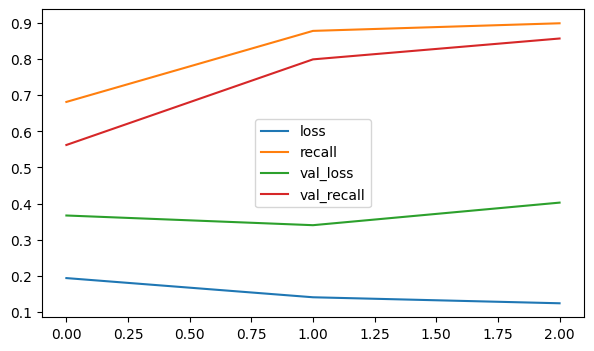

In [ ]:
model_loss.plot()

In [ ]:
BR_model.evaluate(train_ds)

477/477 [==============================] - 21s 42ms/step - loss: 0.3430 - recall: 0.9143


[0.34298452734947205, 0.9143162965774536]

In [ ]:
BR_model.evaluate(test_ds)

133/133 [==============================] - 6s 33ms/step - loss: 0.3857 - recall: 0.8646


[0.38567909598350525, 0.8646232485771179]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
def eval_metric(model, X_train, y_train, X_test, y_test):

    y_train_pred = model.predict(train_ds) > 0.5
    y_pred = model.predict(test_ds) > 0.5
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(BR_model, X_train, y_train, X_test, y_test)

133/133 [==============================] - 5s 28ms/step
Test_Set
[[3017  434]
 [ 106  677]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      3451
           1       0.61      0.86      0.71       783

    accuracy                           0.87      4234
   macro avg       0.79      0.87      0.82      4234
weighted avg       0.90      0.87      0.88      4234


Train_Set
[[10990  1449]
 [  240  2561]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     12439
           1       0.64      0.91      0.75      2801

    accuracy                           0.89     15240
   macro avg       0.81      0.90      0.84     15240
weighted avg       0.92      0.89      0.90     15240



133/133 [==============================] - 5s 28ms/step


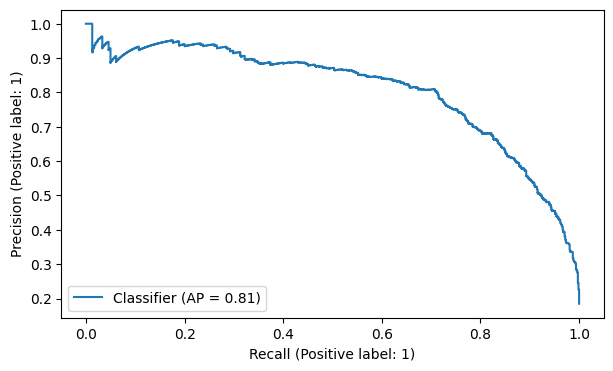

In [ ]:
y_pred_proba = BR_model.predict(test_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [ ]:
BERT_model_AP = average_precision_score(y_test, y_pred_proba)
BERT_model_f1 = f1_score(y_test, y_pred_proba > 0.5)
BERT_model_rec = recall_score(y_test, y_pred_proba > 0.5)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

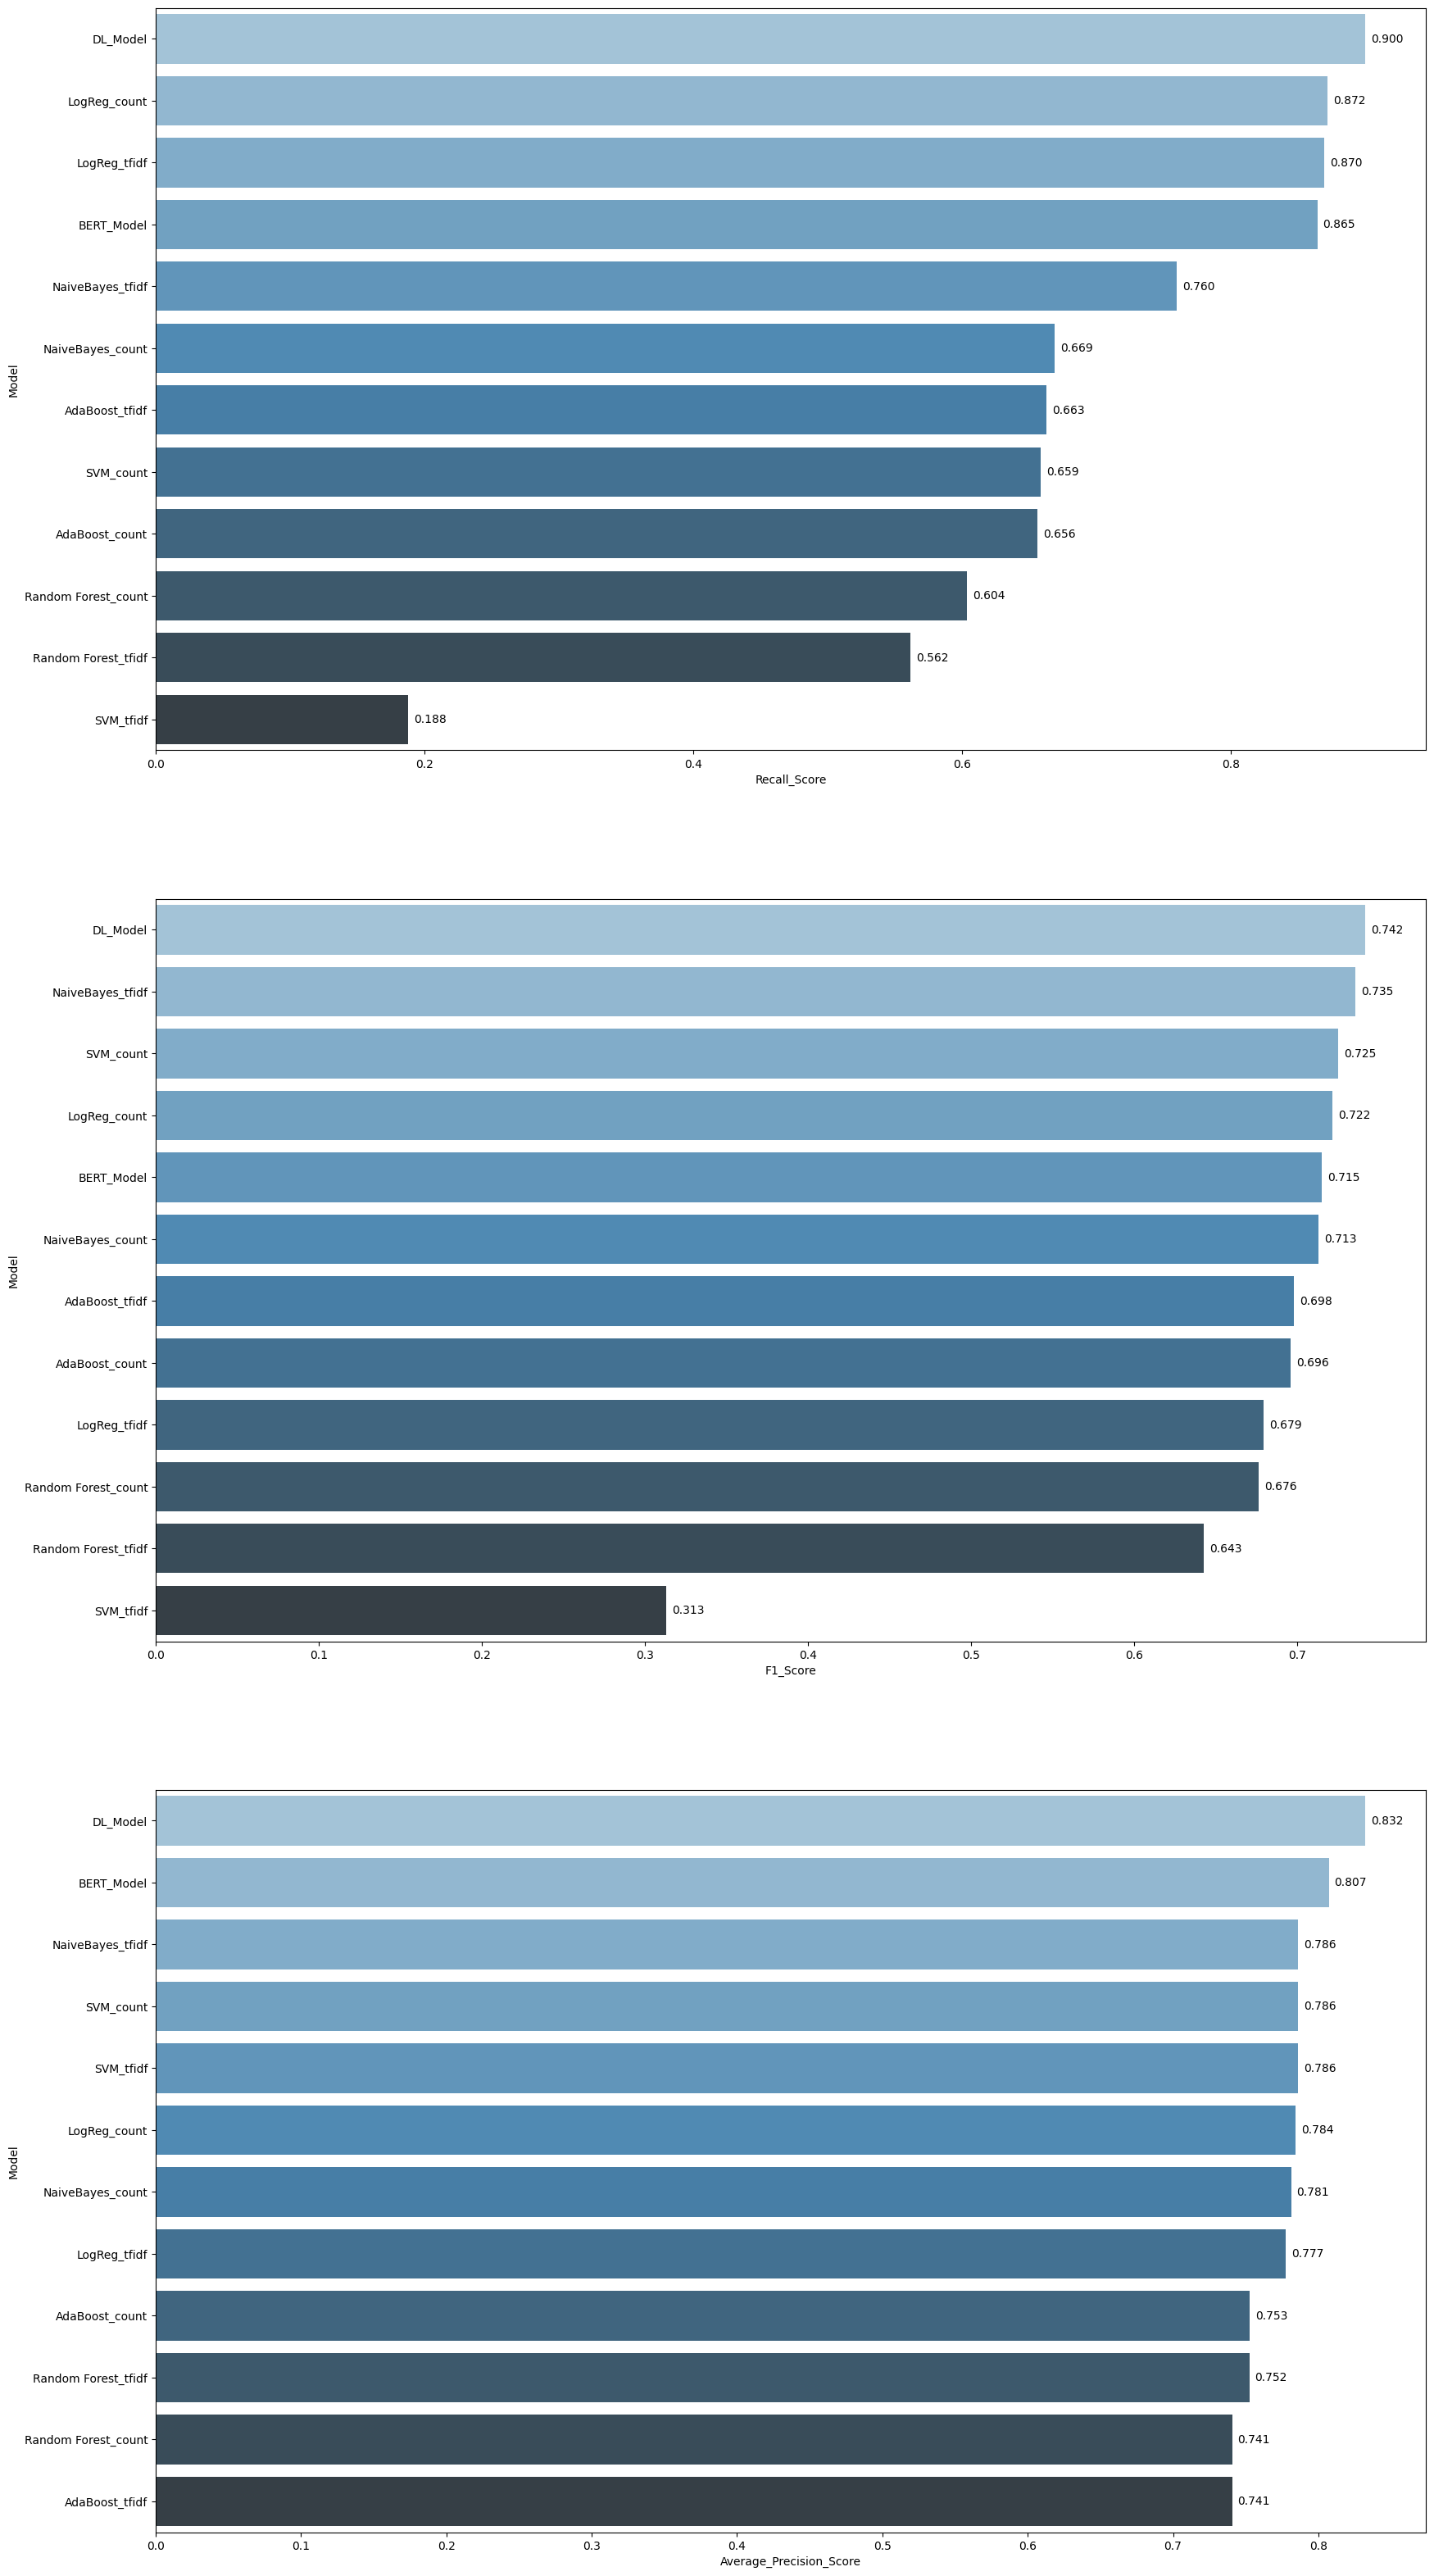

In [ ]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "NaiveBayes_tfidf", "SVM_count", "SVM_tfidf",
                                  "Random Forest_count", "Random Forest_tfidf",
                                   "AdaBoost_count", "AdaBoost_tfidf",
                                  "LogReg_tfidf", "LogReg_count",
                                  "DL_Model", "BERT_Model"],

                        "F1_Score": [nb_count_f1_neg, nb_tf_f1_neg, svc_f1_neg, svc_tf_f1_neg,
                                     rf_count_f1_neg, rf_tf_f1_neg, ada_count_f1_neg, ada_t_f1_neg,
                                     log_Tf_f1_neg, log_count_f1_neg, DL_f1, BERT_model_f1
                                     ],

                        "Recall_Score": [nb_count_rec_neg , nb_tf_rec_neg, svc_rec_neg, svc_tf_rec_neg,
                                          rf_count_rec_neg, rf_tf_rec_neg, ada_count_rec_neg, ada_t_rec_neg,
                                         log_Tf_rec_neg, log_count_rec_neg,DL_rec,
                                         BERT_model_rec
                                        ],

                        "Average_Precision_Score": [nb_AP_neg, nb_tf_neg, svc_neg, svc_tf_neg,
                                                    rf_AP_neg, rf_tf_AP_neg, ada_AP_neg, ada_t_AP_neg,
                                                    log_Tf_neg, log_AP_neg, DL_AP,
                                                    BERT_model_AP]
                        })


plt.figure(figsize=(20,40))

# Plotting Recall Score
plt.subplot(311)
compare_recall = compare.sort_values(by="Recall_Score", ascending=False)
ax = sns.barplot(x="Recall_Score", y="Model", data=compare_recall, palette="Blues_d")
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.3f'),
                (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0),
                textcoords='offset points',
                ha='left', va='center')

# Plotting F1 Score
plt.subplot(312)
compare_f1 = compare.sort_values(by="F1_Score", ascending=False)
ax = sns.barplot(x="F1_Score", y="Model", data=compare_f1, palette="Blues_d")
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.3f'),
                (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0),
                textcoords='offset points',
                ha='left', va='center')

# Plotting Average Precision Score
plt.subplot(313)
compare_ap = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax = sns.barplot(x="Average_Precision_Score", y="Model", data=compare_ap, palette="Blues_d")
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.3f'),
                (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0),
                textcoords='offset points',
                ha='left', va='center')

plt.show()

### Conclusion

*As a result, the best model here for this NLP sentiment analysis is the DL (GRU) model. The other models may achieve better results with architecture enhancements or parameter tuning, such as the SVM. In general, we can say that in this situation, we can use the GRU and BERT rather than the ML models, since these two models have achieved good results among all three metrics.*